 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

## Import Libraries

In [8]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

## Set Functions

### Read CSV and return index using date time

Example

amd_df = csvread_date(ticker_ = "AMD",location_ = "../Code/Resources/sp500_history.csv", column_ = "Date")

In [88]:
#Takes in closing dates and closing price and creates a DataFrame with average daily returns

def csvread_date(location_,column_):
    
    #Define path
    ticker_data = Path(location_)
    
    # Reading whale returns and set index with column_ object
    ticker_df = pd.read_csv(ticker_data, index_col=column_, infer_datetime_format=True, parse_dates=True)
    
    # Sort by Date
    ticker_df.sort_index(inplace=True)
    
    # x = df | Return DataFrame indexed by date_time
    return ticker_df

def sheets_returns_csvread_date(location_,column_,name_):
    
    #Define path
    ticker_data = Path(location_)
    
    # Reading whale returns and set index with column_ object
    ticker_df = pd.read_csv(ticker_data, index_col=column_, infer_datetime_format=True, parse_dates=True)
    
    # Sort by Date
    ticker_df.sort_index(inplace=True)
    
    #Remove Null Columns
    ticker_df.drop(columns=ticker_df.columns[[0,2,3]], axis=1, inplace=True)
    
    #Rename Close Price Column
    ticker_df.rename(columns = {"Close":name_}, inplace = True)
    
    #Average Return
    # ticker_df = ticker_df.pct_change().copy()
    
    #Drop Nulls
    ticker_df.dropna(inplace=True)
    
    #Print Basic Graph
    ticker_df.plot(figsize = (20,5), title = name_)
    
    # x = df | Return DataFrame indexed by date_time
    return ticker_df

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [10]:
# Reading whale returns
whale_returns_df = csvread_date(location_ = "../Code/Resources/whale_returns.csv", column_ = "Date")

In [11]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [12]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()
type(whale_returns_df)

pandas.core.frame.DataFrame

.sort_index## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [13]:
# Reading algorithmic returns
algo_returns_df = csvread_date(location_ = "../Code/Resources/algo_returns.csv", column_ = "Date")

In [14]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [15]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [16]:
# Reading S&P 500 Closing Prices
sp500_history_df = csvread_date(location_ = "../Code/Resources/sp500_history.csv", column_ = "Date") 

In [17]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [18]:
# Fix Data Types Change object to float
sp500_history_df['Close'] = pd.to_numeric(sp500_history_df['Close'].str.replace("$","",regex=False))

In [19]:
# Calculate Daily Returns
sp500_returns = sp500_history_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [20]:
# Drop nulls
sp500_returns = sp500_returns.dropna().copy()

In [21]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns = {'Close':'S&P Return'}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns_daily = pd.concat([whale_returns_df, algo_returns_df, sp500_returns], axis="columns", join="inner")

all_returns_daily.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

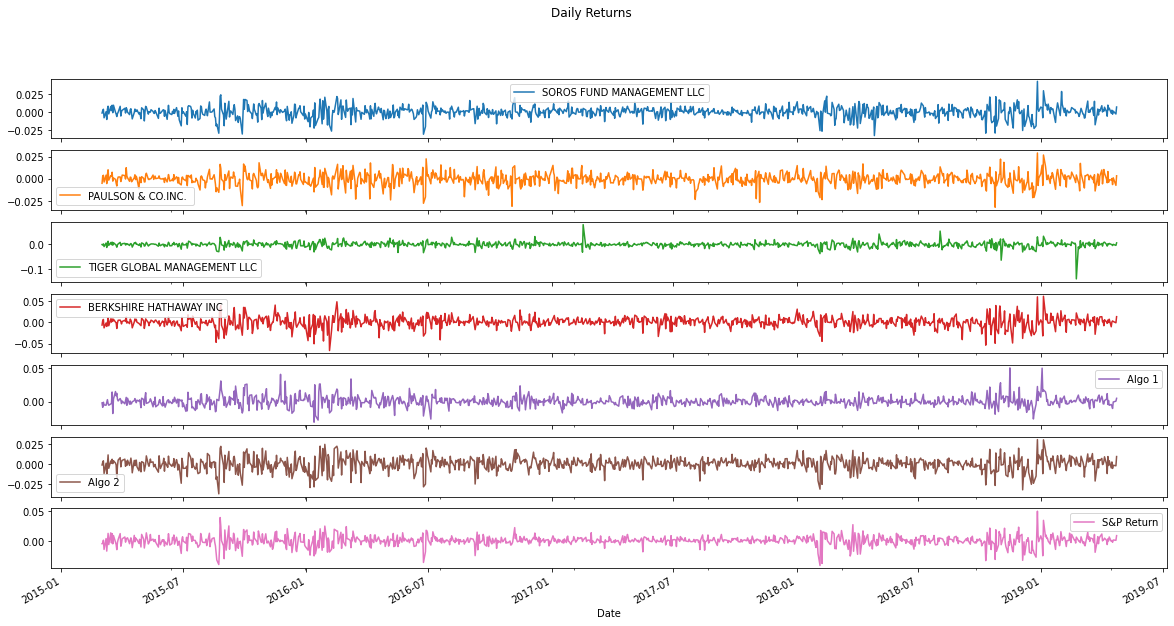

In [23]:
# Plot daily returns of all portfolios
all_returns_daily.plot(subplots=True, figsize=(20,10), title = "Daily Returns")

#### Calculate and Plot cumulative returns.

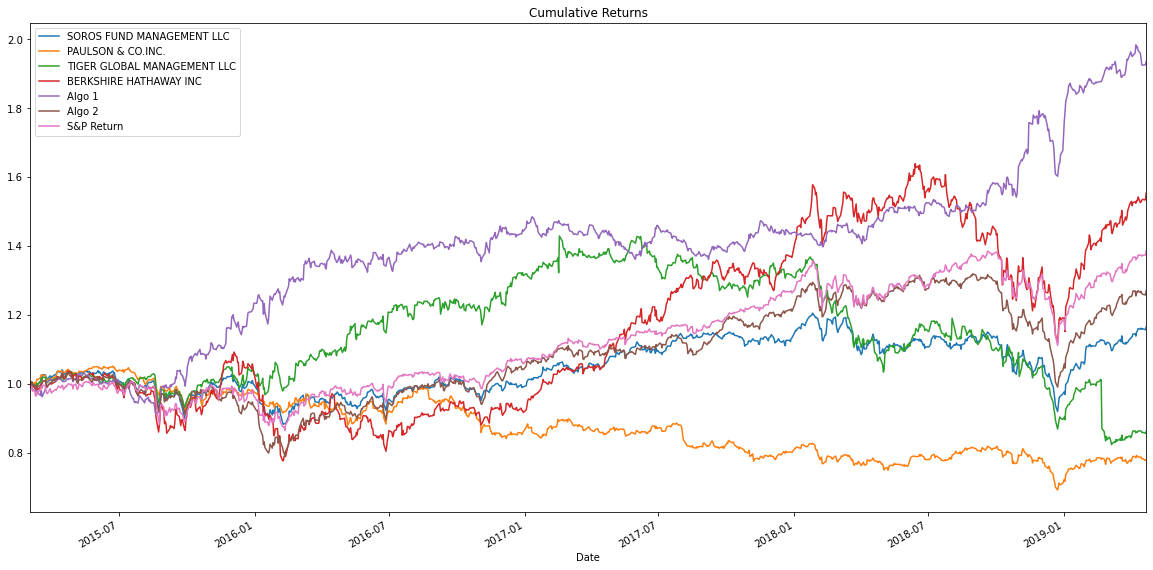

In [24]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns_daily).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title = "Cumulative Returns").margins(x=0)

---joined_data_rows

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


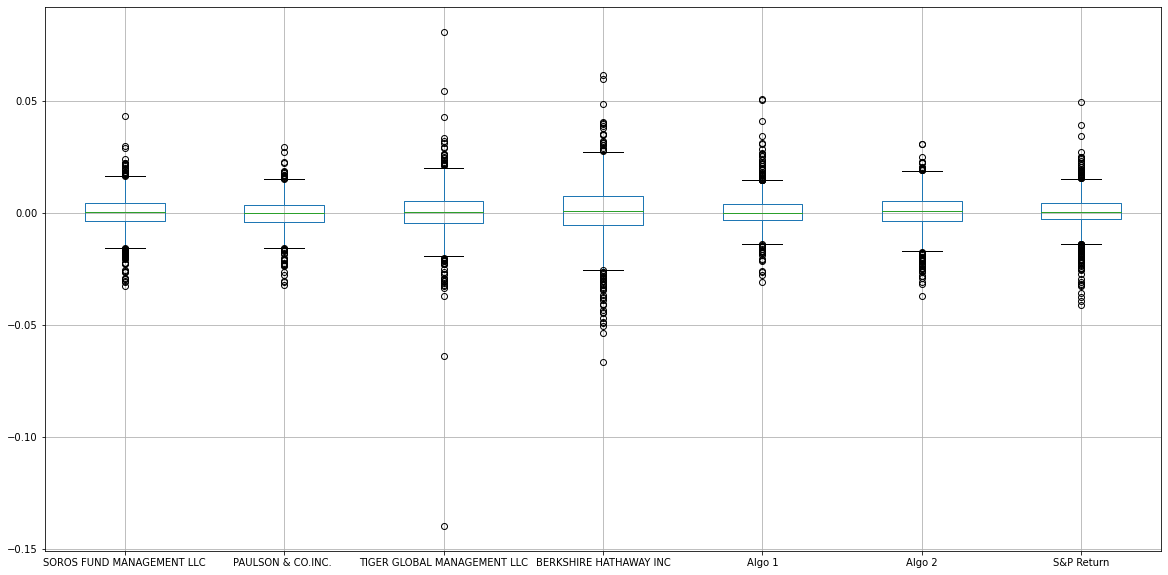

In [25]:
# Box plot to visually show risk
boxplot = all_returns_daily.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [26]:
# Calculate the daily standard deviations of all portfolios
all_std = all_returns_daily.std()

### Determine which portfolios are riskier than the S&P 500

In [27]:
# Determine which portfolios are riskier than the S&P 500
sp_volatility = all_std > all_std['S&P Return']
sp_volatility.loc[sp_volatility == True]

TIGER GLOBAL MANAGEMENT LLC    True
BERKSHIRE HATHAWAY INC         True
dtype: bool

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
all_std_annual = all_std * np.sqrt(252)
all_std_annual.sort_values(ascending=True)

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P Return                     0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

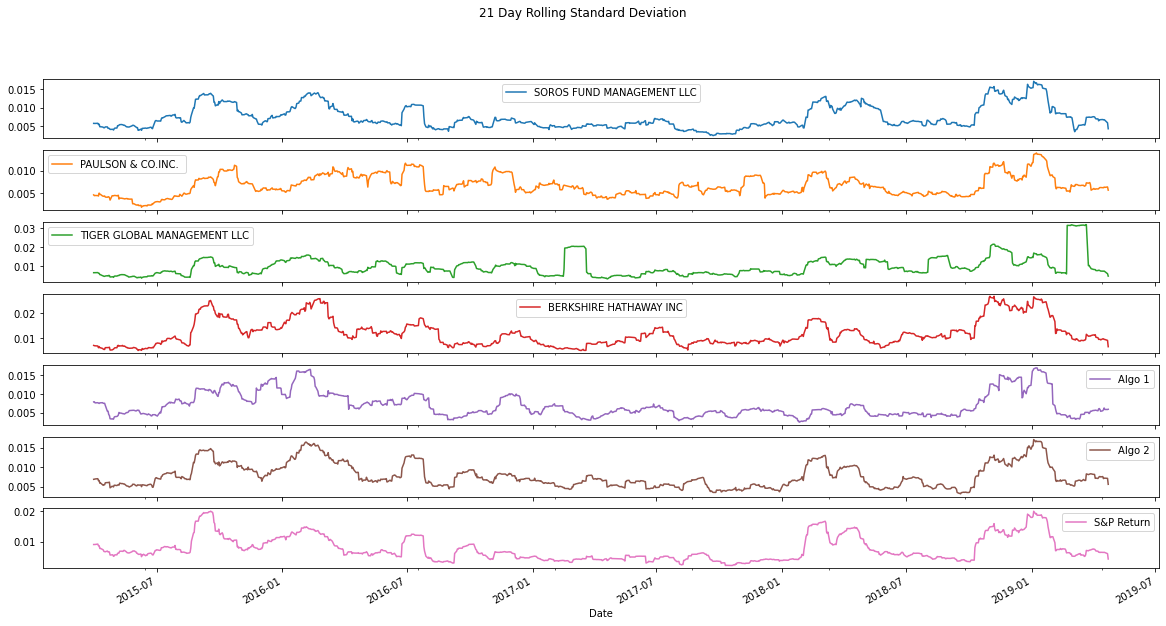

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = all_returns_daily.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_21.plot(subplots=True, figsize=(20,10), title = "21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

<AxesSubplot:>

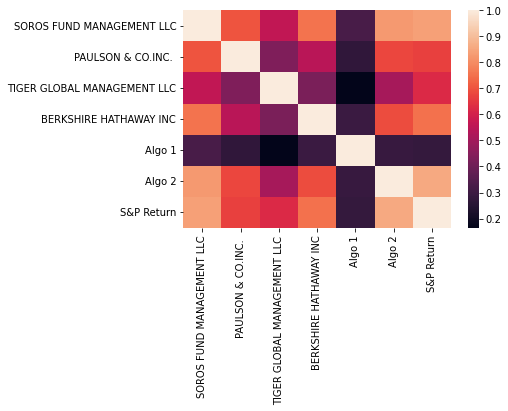

In [30]:
# Calculate the correlation
correlation = all_returns_daily.corr()
# Display de correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [31]:
# Calculate covariance of a single portfolio
covariance = all_returns_daily['Algo 2'].cov(all_returns_daily['S&P Return'])
covariance

6.12793237414499e-05

In [32]:
# Calculate variance of S&P 500
variance = all_returns_daily['S&P Return'].var()
variance

7.316632424648712e-05

In [33]:
# Computing beta
algo2_beta = covariance / variance
algo2_beta

0.8375345402757753

#### Plot beta trend

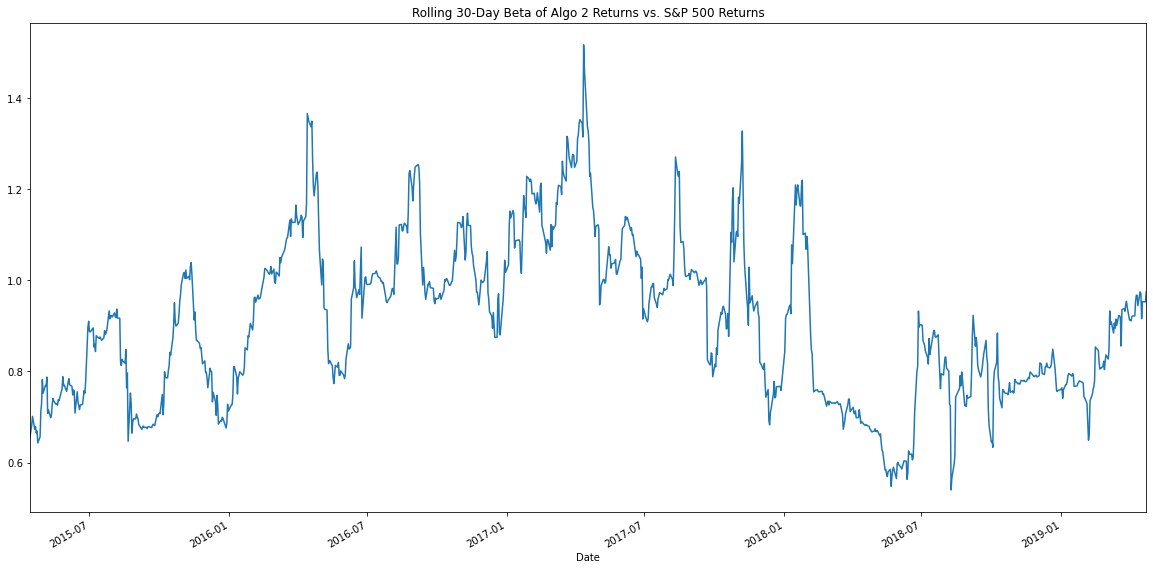

In [34]:
# Calculate 30-day rolling covariance of Algo 2 vs. S&P 500 and plot the data
algo2_rolling_covariance = all_returns_daily['Algo 2'].rolling(window=30).cov(all_returns_daily['S&P Return'])

# Calculate 30-day rolling variance of S&P 500 
sp500_rolling_variance = all_returns_daily['S&P Return'].rolling(window=30).var()

# Calculate 30-day rolling beta of Algo 2 and plot the data
algo2_rolling_beta = algo2_rolling_covariance / sp500_rolling_variance

algo2_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 2 Returns vs. S&P 500 Returns').margins(x=0)

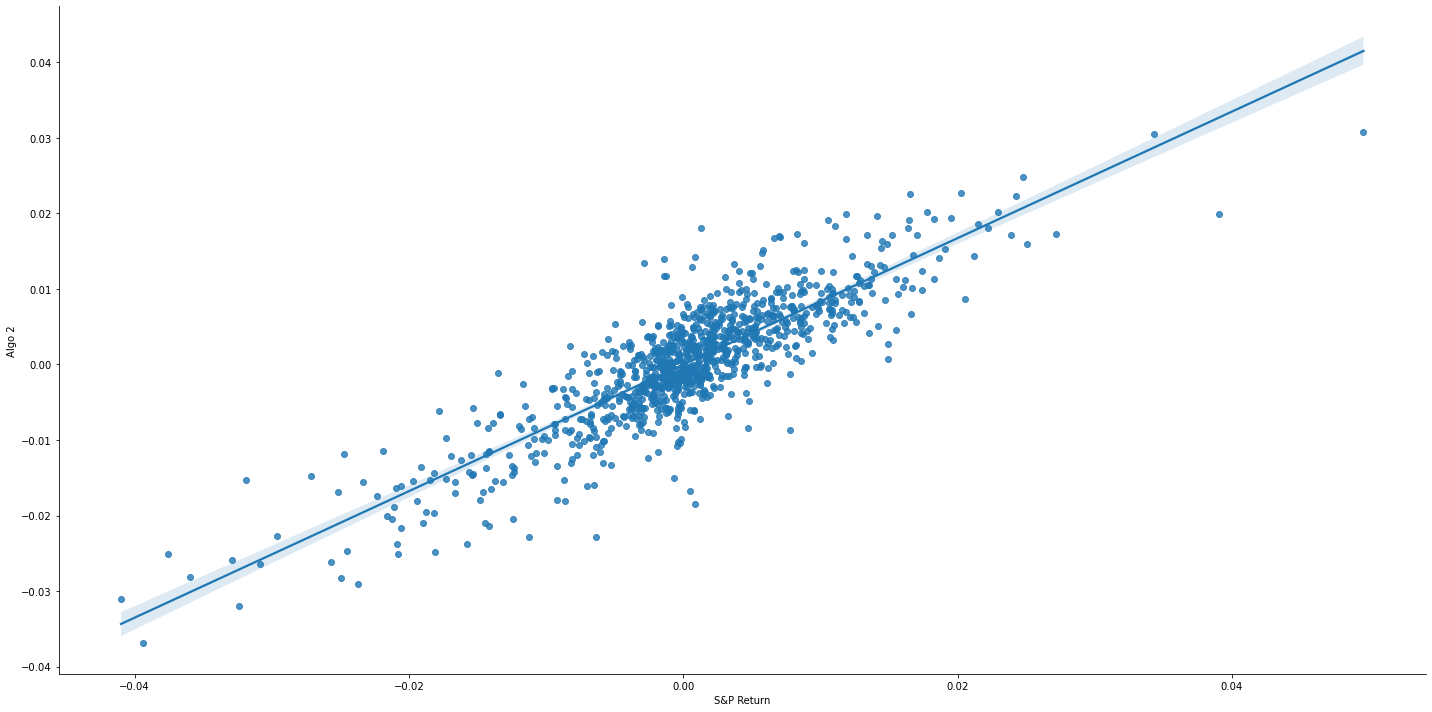

In [35]:
#Showcase beta vs. correlation by plotting a scatterplot using the Seaborn library and fitting a regression line
sns.lmplot(x='S&P Return', y='Algo 2', data=all_returns_daily, height = 10, aspect= 2, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

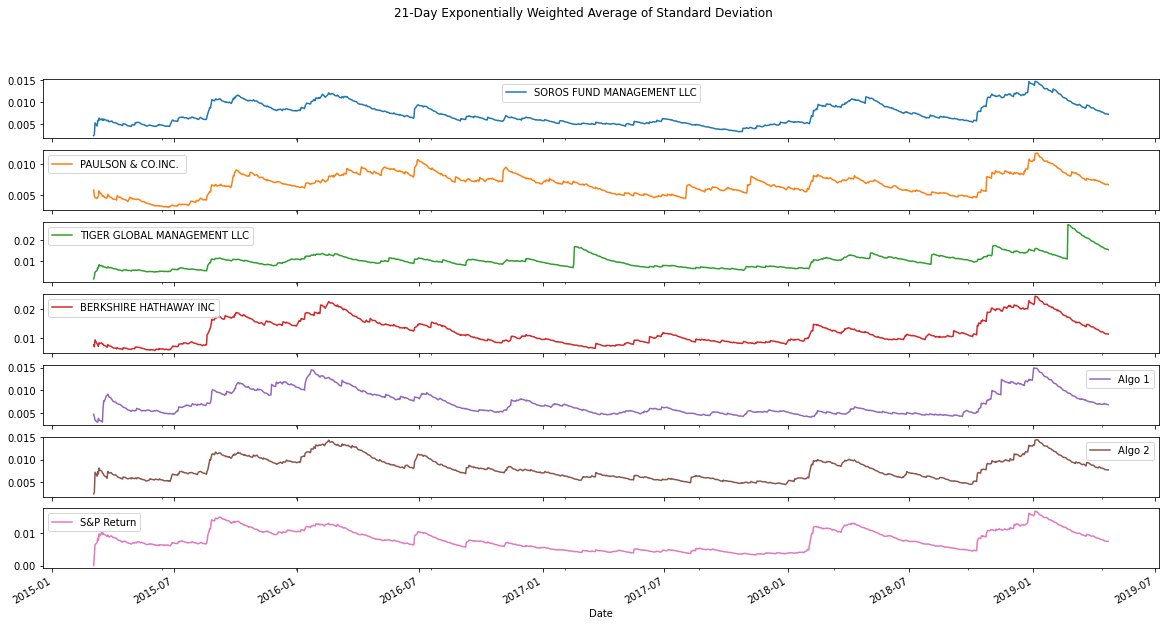

In [36]:
# Use `ewm` to calculate the rolling window
all_returns_daily.ewm(halflife=21).std().plot(subplots=True, figsize=[20,10], title="21-Day Exponentially Weighted Average of Standard Deviation")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [37]:
# Annualized Sharpe Ratios
all_sharpe_ratios = (all_returns_daily.mean() * 252) / (all_std_annual)
all_sharpe_ratios.sort_values(ascending = False)

Algo 1                         1.378648
S&P Return                     0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

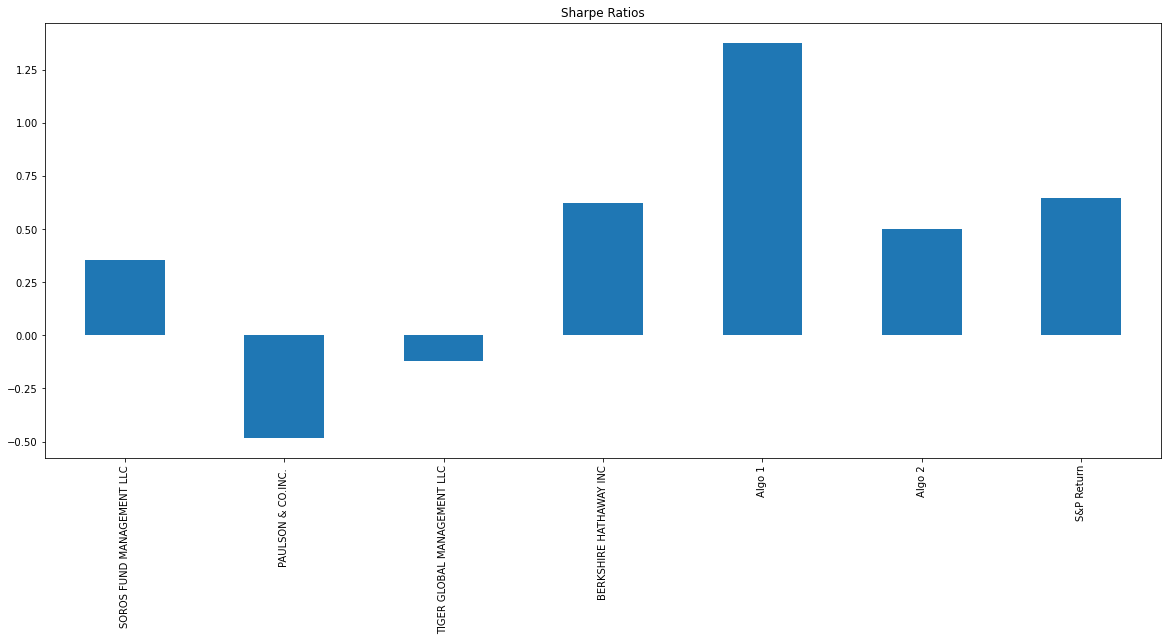

In [38]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot.bar(figsize=(20,8), title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

### Algorithmic Trading Peformance Metrics

When backtesting metrics to measure performance and risk, the "Algo 1" has proven to be superior to the market (S&P 500) and the whale hedge funds.

The data shows that it is possible to have a low risk algorithm that can beat the market.

However "Algo 2" has had strong correlation with the market and the preformance has been average when compared to the whale funds. 

The Beta of Algo 2 does trend below 1 when compared to the S&P500 which indicates low risk of extreme volatility.

#### In Summary

Algortihmic trading can be an effective way to manage risk in a diversified portfolio.

The size of the fund may impact the strategies and the position sizing was not taken into account in this study. 

The psycological benifits of an algorithmic strategies may also be a qualatative benifit as more time can be spent developing trading strategies when trading is automated.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

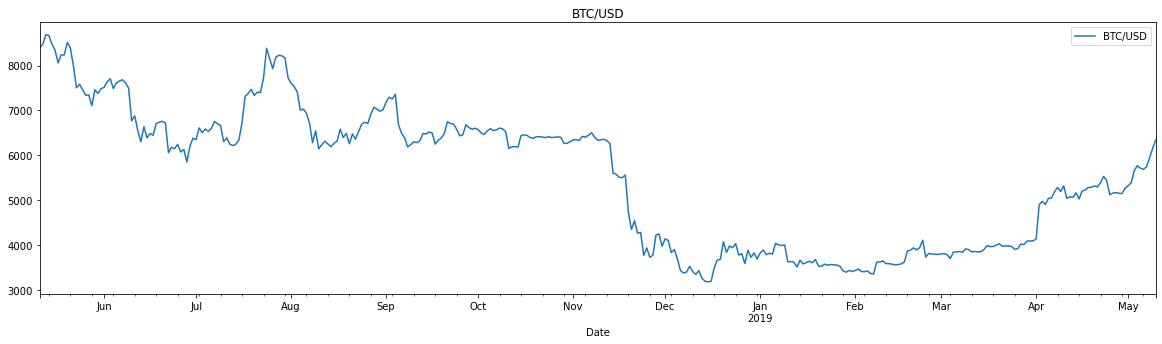

In [89]:
# Reading data from 1st stock
btc_history_df = sheets_returns_csvread_date(location_ = "../Code/Resources/btc_historical.csv", column_ = "Date", name_ = "BTC/USD")

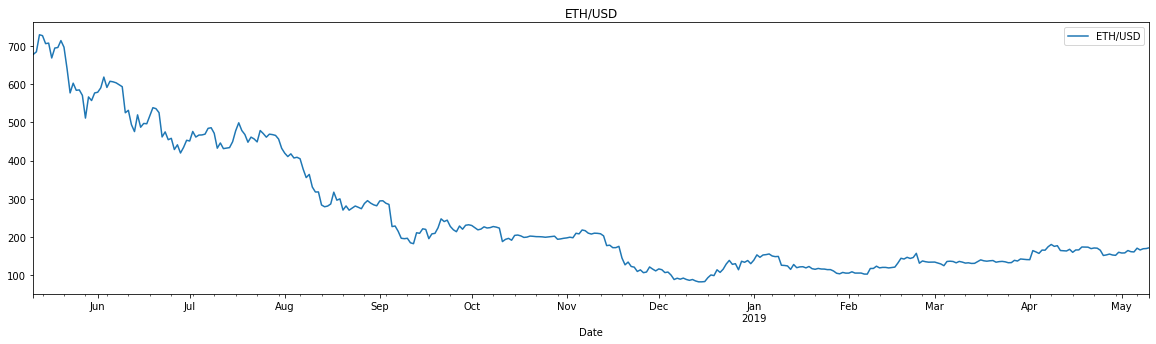

In [90]:
# Reading data from 2nd stock
eth_history_df = sheets_returns_csvread_date(location_ = "../Code/Resources/eth_historical.csv", column_ = "Date", name_ = "ETH/USD") 

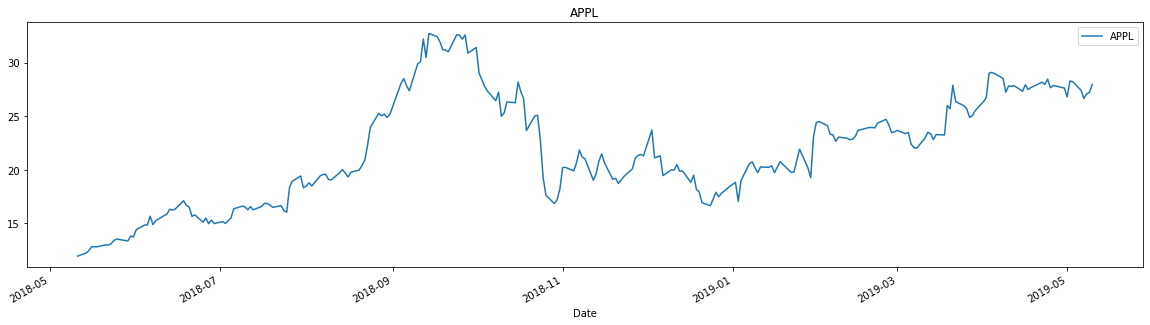

In [91]:
# Reading data from 3rd stock
amd_history_df = sheets_returns_csvread_date(location_ = "../Code/Resources/amd_historical.csv", column_ = "Date", name_ = "APPL") 

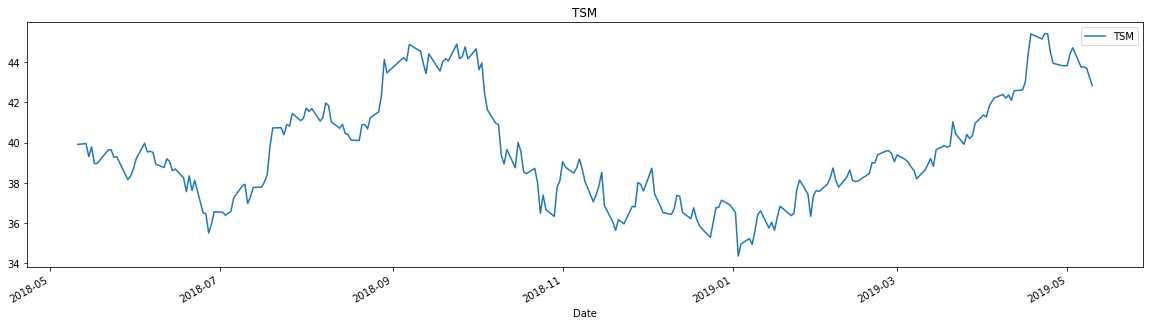

In [92]:
tsm_history_df = sheets_returns_csvread_date(location_ = "../Code/Resources/tsm_historical.csv", column_ = "Date", name_ = "TSM") 

In [93]:
# Combine all stocks in a single DataFrame
all_custom = pd.concat([btc_history_df, eth_history_df, amd_history_df, tsm_history_df], axis="columns", join="outer")

all_custom

,BTC/USD,ETH/USD,APPL,TSM
Date,,,,
2018-05-11,8403.33,678.05,11.95,39.91
2018-05-12,8475.00,684.66,NaN,NaN
2018-05-13,8686.10,729.29,NaN,NaN
2018-05-14,8670.00,726.90,12.23,39.95
2018-05-15,8477.46,706.08,12.45,39.30
...,...,...,...,...
2019-05-06,5687.90,171.07,27.42,43.76
2019-05-07,5743.30,166.34,26.66,43.76
2019-05-08,5943.60,169.58,27.09,43.70


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!